In [1]:
import pandas as pd
import glob
import os


def read_csv_file(file_path):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The DataFrame containing the CSV data.
    """
    try:
        df = pd.read_csv(file_path,skiprows=3)
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

In [2]:
# Get list of solar files
wind_files = glob.glob('Wind_202*.csv')
print("Found files:", wind_files)

# Read and combine all files
dfs = []
for file in wind_files:
    df = read_csv_file(file)
    if df is not None:
        dfs.append(df)
        print(f"Added {file} with shape {df.shape}")

# Combine all DataFrames
if dfs:
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    print(f"\nCombined DataFrame shape: {combined_df.shape}")
    print("\nFirst few rows:")
    print(combined_df.head())
else:
    print("No valid DataFrames to combine")

# Make electicity from kWH to MWh 
combined_df['electricity'] = combined_df['electricity'] / 1000.0 # Convert kWh to MWh
combined_df.to_csv('combined_wind_data.csv', index=False)
print("Combined data saved to 'combined_wind_data.csv'")

Found files: ['Wind_2020.csv', 'Wind_2021.csv', 'Wind_2022.csv', 'Wind_2023.csv', 'Wind_2024.csv']
Added Wind_2020.csv with shape (8784, 3)
Added Wind_2021.csv with shape (8760, 3)
Added Wind_2022.csv with shape (8760, 3)
Added Wind_2023.csv with shape (8760, 3)
Added Wind_2024.csv with shape (8784, 3)

Combined DataFrame shape: (43848, 3)

First few rows:
               time        local_time  electricity
0  2020-01-01 00:00  2020-01-01 01:00    13865.115
1  2020-01-01 01:00  2020-01-01 02:00    13011.339
2  2020-01-01 02:00  2020-01-01 03:00    13670.585
3  2020-01-01 03:00  2020-01-01 04:00    13611.377
4  2020-01-01 04:00  2020-01-01 05:00    14783.747
Combined data saved to 'combined_wind_data.csv'


# Check Which Distributions fits Production Best (Hourly)

[30-07-2025 13:39:43] [distfit.distfit] [INFO] fit
[30-07-2025 13:39:43] [distfit.distfit] [INFO] transform
[30-07-2025 13:39:43] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 0.00723771] [loc=11.407 scale=7.609]
[30-07-2025 13:39:43] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 0.00782891] [loc=0.000 scale=11.407]
[30-07-2025 13:39:43] [distfit.distfit] [INFO] [pareto    ] [0.01 sec] [RSS: 0.00782891] [loc=-1073741824.000 scale=1073741824.000]
[30-07-2025 13:39:43] [distfit.distfit] [INFO] [dweibull  ] [0.17 sec] [RSS: 0.00762927] [loc=11.249 scale=6.963]
[30-07-2025 13:39:45] [distfit.distfit] [INFO] [t         ] [2.03 sec] [RSS: 0.00723766] [loc=11.407 scale=7.609]
[30-07-2025 13:39:46] [distfit.distfit] [INFO] [genextreme] [0.62 sec] [RSS: 0.0047654] [loc=7.853 scale=6.180]
[30-07-2025 13:39:46] [distfit.distfit] [INFO] [gamma     ] [0.11 sec] [RSS: 0.00253614] [loc=-0.102 scale=6.553]
[30-07-2025 13:39:46] [distfit.distfit] [INFO] [lognorm   ] [0.38 sec] [RSS: 0

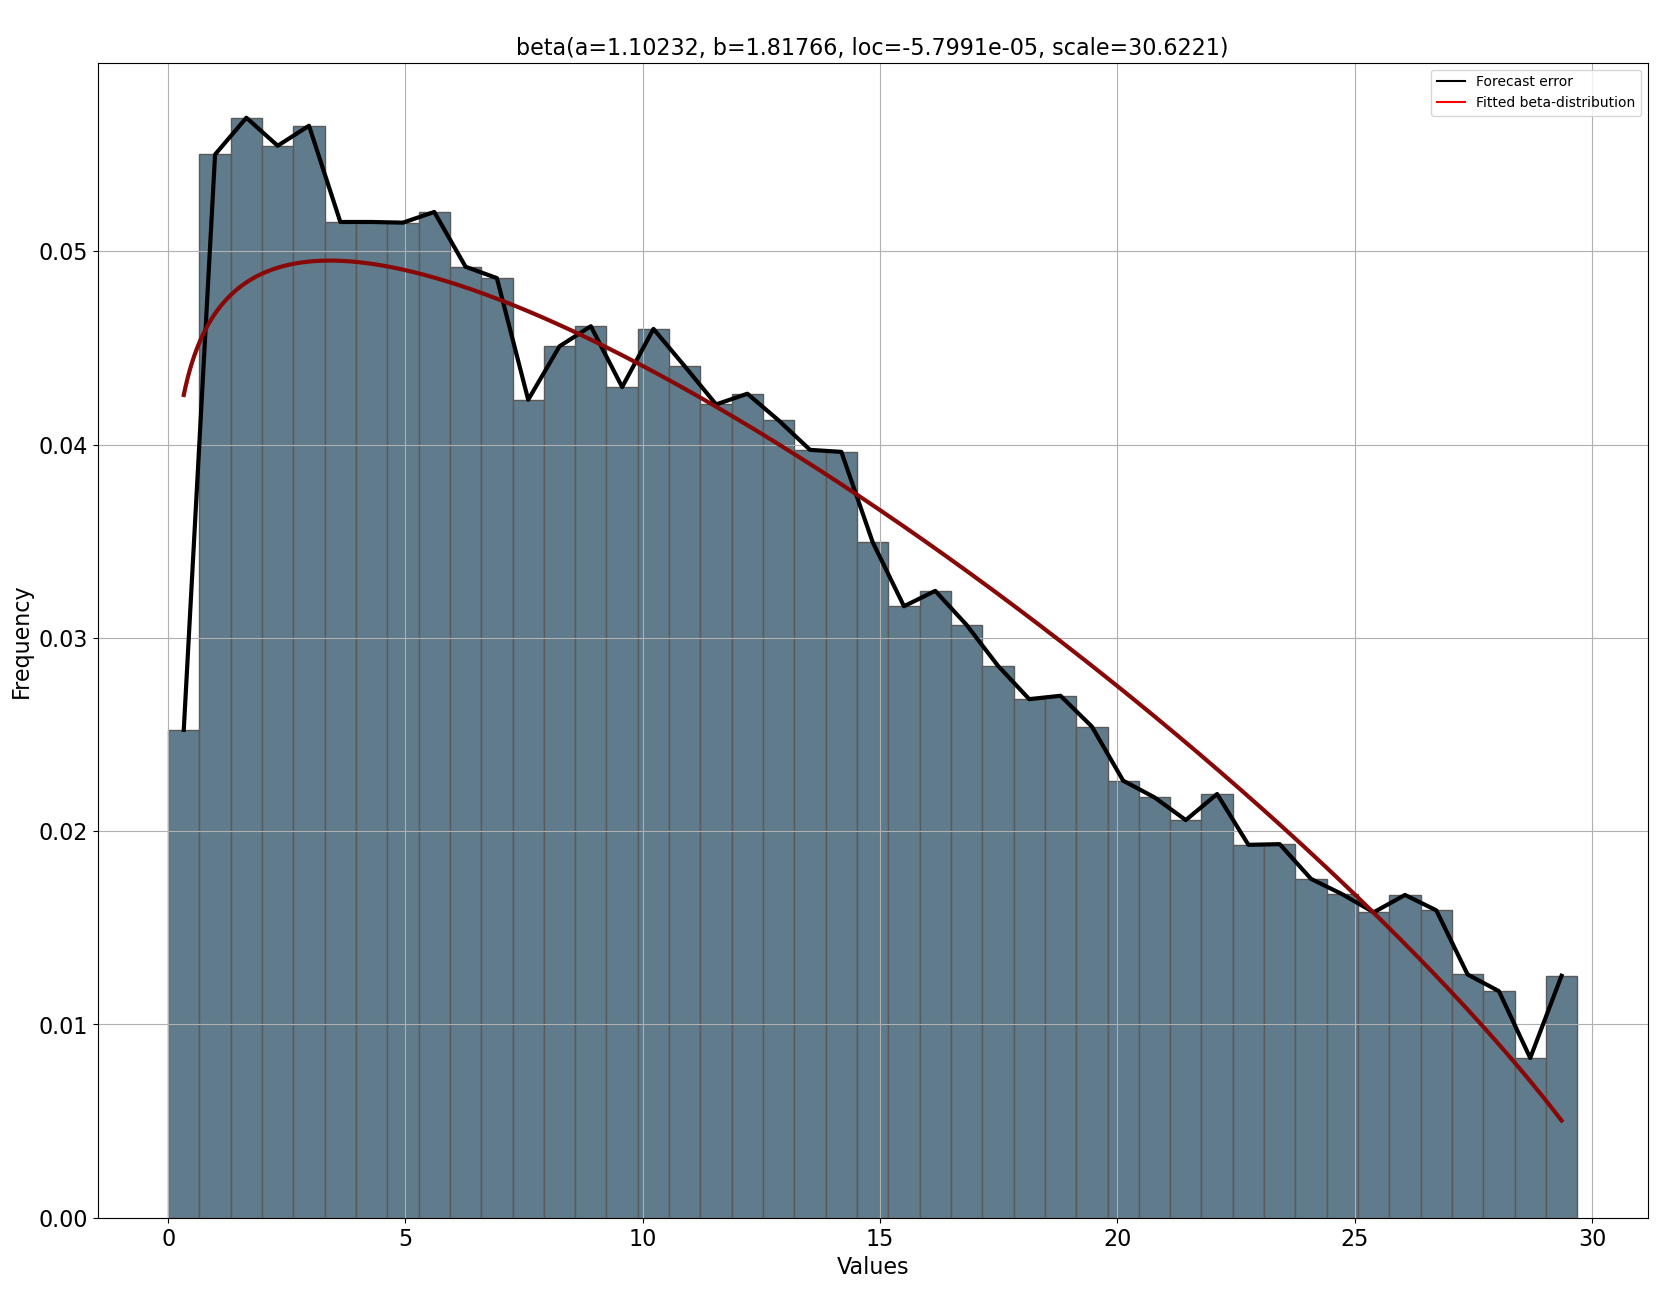

In [3]:
from distfit import distfit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

dist = distfit()


# Find best theoretical distribution for empirical data X
dist.fit_transform(combined_df['electricity'])
fig, ax = dist.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Fitted beta-distribution")
handles = [l1, l2]
ax.legend(handles=handles)

# Find Best Distriubtion for Yearly Data

In [4]:
yearly_prod =combined_df['electricity']
yearly_prod.index = pd.to_datetime(combined_df['time'])
yearly_prod =  yearly_prod.resample('ME').sum()/1000 # Resample to yearly sum GWH
print(f" Average Production {yearly_prod.mean()}, Volatility {yearly_prod.std()}")

 Average Production 8.33600689235, Volatility 2.0145301601572787


In [5]:
yearly_prod.describe()

count    60.000000
mean      8.336007
std       2.014530
min       4.119750
25%       7.089021
50%       8.242461
75%       9.162486
max      13.266278
Name: electricity, dtype: float64

[30-07-2025 13:39:50] [distfit.distfit] [INFO] fit
[30-07-2025 13:39:50] [distfit.distfit] [INFO] transform
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 0.0208559] [loc=8.336 scale=1.998]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 0.0791927] [loc=4.120 scale=4.216]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 0.0791927] [loc=-268435451.880 scale=268435456.000]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [dweibull  ] [0.00 sec] [RSS: 0.0150033] [loc=8.220 scale=1.631]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [t         ] [0.03 sec] [RSS: 0.0208483] [loc=8.336 scale=1.997]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [genextreme] [0.02 sec] [RSS: 0.0189677] [loc=7.558 scale=1.874]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [gamma     ] [0.01 sec] [RSS: 0.0185661] [loc=-2.395 scale=0.372]
[30-07-2025 13:39:50] [distfit.distfit] [INFO] [lognorm   ] [0.00 sec] [RSS: 0.018394] [lo

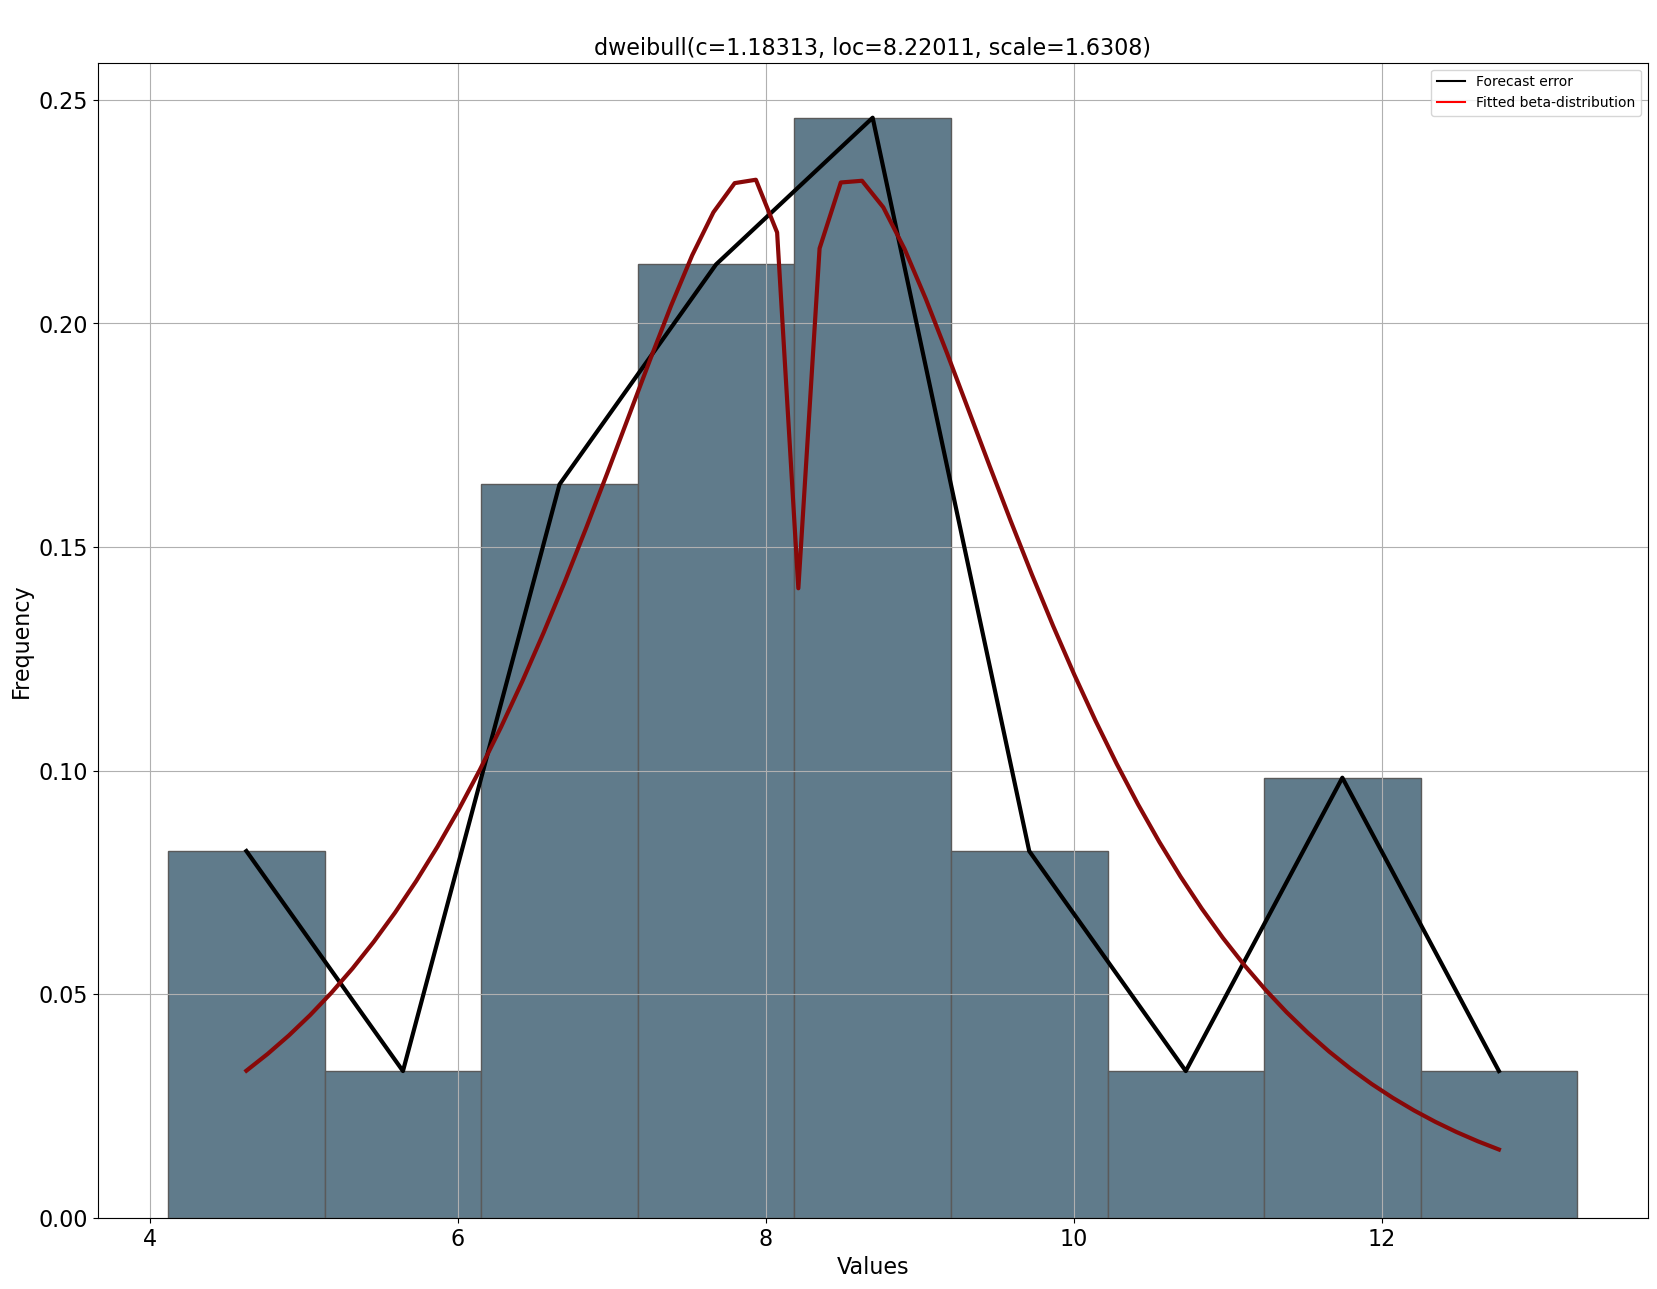

In [6]:
dist_yearly = distfit()
# Find best theoretical distribution for empirical data X
dist_yearly.fit_transform(yearly_prod)
fig, ax = dist_yearly.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Fitted beta-distribution")
handles = [l1, l2]
ax.legend(handles=handles)
